## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.24312477,  0.63726277],
       [ 0.07926158, -1.902264  ],
       [ 0.07351518,  1.79934105],
       ...,
       [-0.04767883, -0.12460642],
       [-0.82712561,  1.52388201],
       [-2.17862477, -0.87830797]])

In [5]:
y

array([ 7.36705869e+01, -1.71776153e+02,  1.71949504e+02, -6.10910113e+01,
       -1.96406510e+01,  4.00415645e+00,  4.36973006e+01,  6.08348153e+01,
        4.20646822e+01,  2.61418689e+01, -1.86168536e+01, -6.05659132e+01,
       -1.76910261e+00,  7.40451260e+01, -9.30617190e+01,  9.95760600e+01,
       -1.39501884e+02,  8.76842403e+00,  1.02427014e+02,  8.99927688e+00,
        2.10247218e+02, -9.90438582e+01, -4.88375026e+01, -1.04963866e+02,
       -1.26246694e+02,  2.85686080e+01, -1.52696096e+02, -1.15662985e+02,
       -7.17844183e+01, -9.75440654e+00, -1.57833806e+02,  6.53091756e+01,
       -1.10999573e+01, -1.74583086e+02,  4.36727261e+01,  5.60433063e+01,
        2.61739100e+02, -1.15143242e+02,  8.06583213e+01, -1.43269323e+00,
        1.65121713e+02,  6.78678398e+01,  4.49649602e+01,  1.28300455e+02,
        5.81295192e+00, -2.22848141e+02, -1.38926641e+01, -1.25243003e+02,
       -5.13563503e+01,  2.15981129e+02,  9.99738905e+01, -8.20735008e+01,
        8.19250390e+01, -

In [6]:
pd.DataFrame(X)[0]

0      0.243125
1      0.079262
2      0.073515
3     -0.898347
4     -0.517321
         ...   
995    0.683678
996    0.344240
997   -0.047679
998   -0.827126
999   -2.178625
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

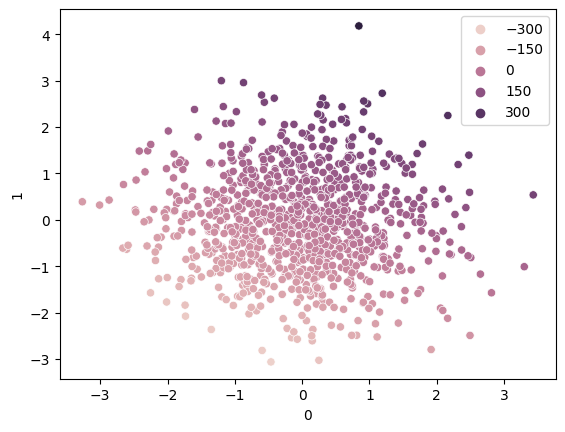

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[51.18005205, 91.78706873]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([ 6.37810934e+01, -5.95949899e+01, -9.18021313e+01,  8.10995498e+01,
       -1.49056232e+01, -2.84342678e+01,  1.19992729e+02,  9.14787064e+01,
       -5.91156992e+01,  3.45074003e+01, -3.80330926e+01,  7.68354311e+01,
       -5.04284833e+01,  1.26730461e+01, -1.19815678e+01,  5.39400832e+00,
        1.99483919e+02,  2.02332512e+00, -9.04646954e+01, -2.41560872e+02,
        2.36004840e+01,  3.67623046e+01,  1.63219016e+02, -5.10677292e+01,
        9.51026625e+01, -1.33483184e+02, -3.17741239e+01,  3.63873128e+01,
        1.65034817e+02, -1.33511428e+02,  1.08873952e+02, -9.20146097e+01,
        8.99921813e+01, -2.11959932e+02, -1.77683774e+01,  1.42025624e+00,
       -4.33250394e+01, -1.09371328e+02, -5.61145762e+01, -9.10794534e+01,
       -1.82957780e+02, -9.40822958e+00,  1.95226903e+02, -1.60017052e+02,
       -9.18122302e+00,  1.16045343e+02,  9.13827479e+01, -4.76797519e+01,
        4.43688838e+01, -1.73540365e+02, -1.18923684e+02,  1.63989783e+02,
       -1.06591374e+01,  

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9992406439030774


## Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.689 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.690 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.692 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.702 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.689 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.709 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.690 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.692 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.702 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9992509049898292
